In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.pyplot import figure
import time
import seaborn as sns

matplotlib.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('train.zip')
df['trip [min]'] = df['trip_duration']/60

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip [min]
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.250000


In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip [min]
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,1.599154e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,8.729053e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.666667e-02
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,6.616667e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.103333e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,1.791667e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,5.877137e+04


In [5]:
df.shape, df.columns

((1458644, 12),
 Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
        'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'trip_duration', 'trip [min]'],
       dtype='object'))

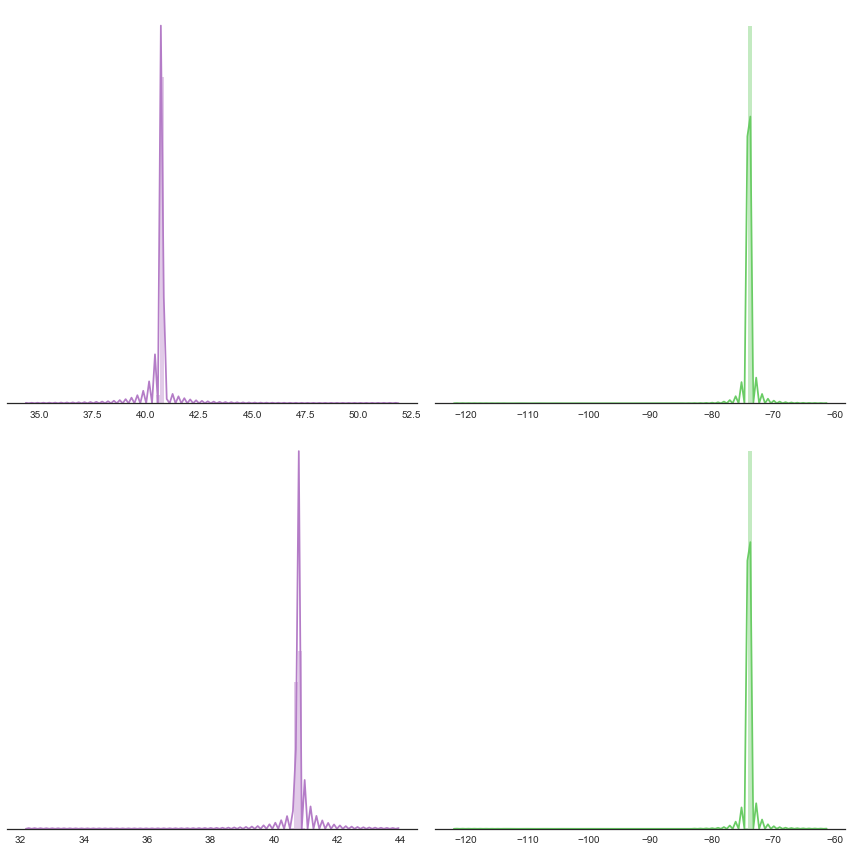

In [6]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

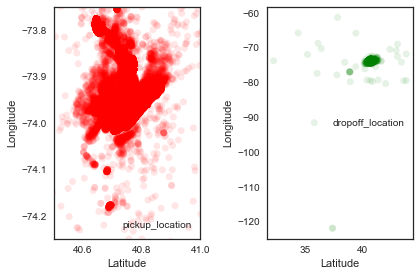

In [33]:
plt.subplot(1, 2, 1)
plt.scatter(df['pickup_latitude'], df['pickup_longitude'], c='red',\
            label='pickup_location', alpha=0.1, edgecolors='none')
plt.ylim([-74.25, -73.75])
plt.xlim([40.5, 41])
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(df['dropoff_latitude'], df['dropoff_longitude'], c='green',\
            label='dropoff_location', alpha=0.1, edgecolors='none')
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

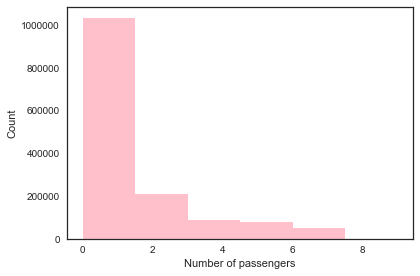

In [8]:
plt.hist(df['passenger_count'], bins=6, color='pink')
plt.ylabel("Count")
plt.xlabel("Number of passengers")
plt.tight_layout()
plt.show()

In [9]:
set(df['pickup_datetime'].map(lambda x: str(x)[:4]))

{'2016'}

In [10]:
weather = pd.read_csv('weather_data_nyc_centralpark_2016.csv')

In [11]:
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [12]:
weather['precipitation'] = weather['precipitation'].replace('T', '0.001')
weather['snow fall'] = weather['snow fall'].replace('T', '0.001')
weather['snow depth'] = weather['snow depth'].replace('T', '0.001')
weather['precipitation'] = weather['precipitation'].astype(float)
weather['snow fall'] = weather['snow fall'].astype(float)
weather['snow depth'] = weather['snow depth'].astype(float)

In [13]:
weather.describe()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,64.625683,49.806011,57.215847,0.115284,0.098402,0.275975
std,18.041787,16.570747,17.124760,0.309657,1.441628,1.928250
min,15.000000,-1.000000,7.000000,0.000000,0.000000,0.000000
25%,50.000000,37.250000,44.000000,0.000000,0.000000,0.000000
50%,64.500000,48.000000,55.750000,0.000000,0.000000,0.000000
75%,81.000000,65.000000,73.500000,0.040000,0.000000,0.000000
max,96.000000,81.000000,88.500000,2.310000,27.300000,22.000000


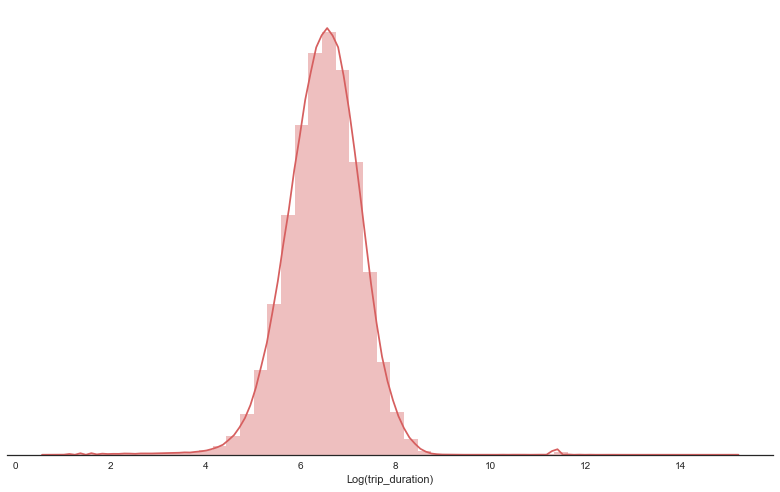

In [14]:
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

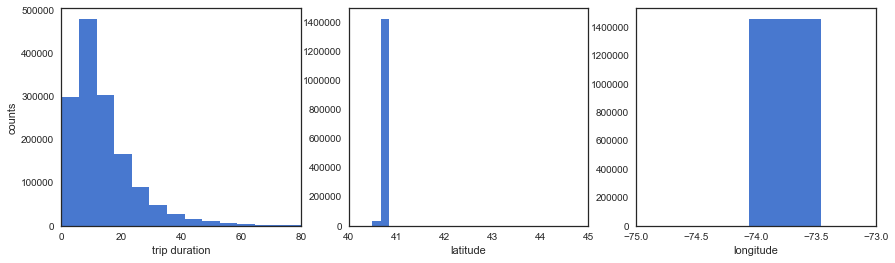

In [15]:
fig, axArray = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
axArray[0].hist(df['trip [min]'],10000)
axArray[0].set_xlim([0, 80])
axArray[0].set_xlabel('trip duration')
axArray[0].set_ylabel('counts')
axArray[1].hist(df['pickup_latitude'] ,100)
axArray[1].set_xlabel('latitude')
axArray[1].set_xlim([40, 45])
axArray[2].hist(df['pickup_longitude'],100)
axArray[2].set_xlabel('longitude')
axArray[2].set_xlim([-75, -73])
plt.show()

In [16]:
pickupTime = pd.to_datetime(df['pickup_datetime'])
df['src hourOfDay'] = (pickupTime.dt.hour*60.0 + pickupTime.dt.minute)   / 60.0
df['dst hourOfDay'] = df['src hourOfDay'] + df['trip [min]'] / 60.0

df['dayOfWeek']     = pickupTime.dt.weekday
df['hourOfWeek']    = df['dayOfWeek']*24.0 + df['src hourOfDay']

df['monthOfYear']   = pickupTime.dt.month
df['dayOfYear']     = pickupTime.dt.dayofyear
df['weekOfYear']    = pickupTime.dt.weekofyear
df['hourOfYear']    = df['dayOfYear']*24.0 + df['src hourOfDay']

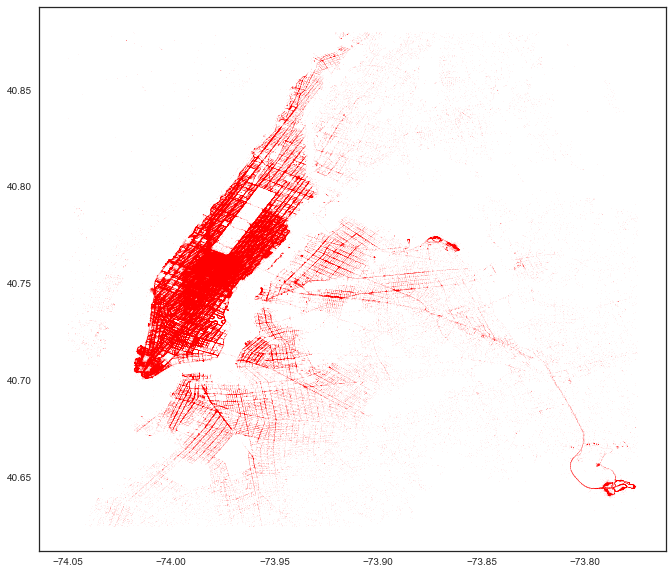

In [45]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
la, lo = [], []
for i in range(len(latitude)):
    if latitude[i] >= 40.625 and latitude[i] <= 40.88:
        if longitude[i] >= -74.05 and longitude[i] <= -73.775:
            la.append(latitude[i])
            lo.append(longitude[i])
plt.figure(figsize = (10,10))
plt.plot(lo,la,'.', alpha = 0.4, markersize = 0.5, color='red')
plt.show()

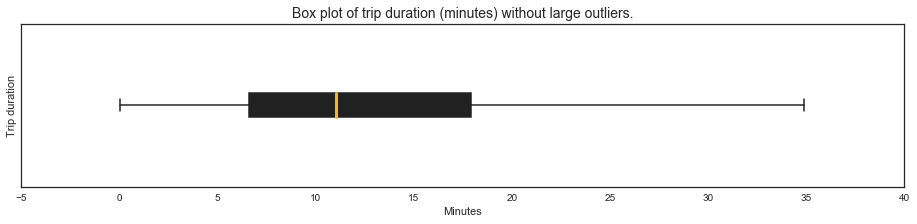

In [46]:
COLOR_DARK = "#212121"
COLOR_YELLOW = "#ffb700"
ax = plt.figure(figsize=(14.1, 3)).add_subplot(111)
boxplot = ax.boxplot(df['trip [min]'], vert=False, patch_artist=True, showfliers=False)
ax.set(xlabel='Minutes', ylabel='Trip duration', xlim=(-5, 40))
ax.get_yaxis().set_ticks([])
for item in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(boxplot[item], color=COLOR_DARK, linewidth=1.5)
plt.setp(boxplot["medians"], color=COLOR_YELLOW, linewidth=3)
plt.title("Box plot of trip duration (minutes) without large outliers.", size=14)
plt.show();

In [47]:
print("The duration of %i %% of the taxi trips was less than 35 minutes." % 
      (100 * np.where(df['trip [min]'] < 35)[0].size / df['trip_duration'].size))
print("The median taxi trip duration was %i minutes." % df['trip [min]'].median())
print("The shortest taxi trip duration was %i second." % df['trip_duration'].min())
print("The longest taxi trip duration was %i days and %i hours." % (
    np.floor(df['trip [min]'].max() / (60 * 24)),
    np.floor(df['trip [min]'].max() / (60 * 24) % 1 * 24)))

The duration of 94 % of the taxi trips was less than 35 minutes.
The median taxi trip duration was 11 minutes.
The shortest taxi trip duration was 1 second.
The longest taxi trip duration was 40 days and 19 hours.
